<a href="https://colab.research.google.com/github/okada-t-rafael/time_series_data_analysis/blob/master/57_Forecasting_AR_With_Statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving uspopulation.csv to uspopulation.csv


{'uspopulation.csv': b'DATE,PopEst\n1/1/2011,311037\n2/1/2011,311189\n3/1/2011,311351\n4/1/2011,311522\n5/1/2011,311699\n6/1/2011,311894\n7/1/2011,312101\n8/1/2011,312317\n9/1/2011,312537\n10/1/2011,312737\n11/1/2011,312920\n12/1/2011,313096\n1/1/2012,313261\n2/1/2012,313419\n3/1/2012,313583\n4/1/2012,313749\n5/1/2012,313924\n6/1/2012,314114\n7/1/2012,314317\n8/1/2012,314535\n9/1/2012,314750\n10/1/2012,314954\n11/1/2012,315143\n12/1/2012,315311\n1/1/2013,315455\n2/1/2013,315591\n3/1/2013,315740\n4/1/2013,315901\n5/1/2013,316077\n6/1/2013,316265\n7/1/2013,316470\n8/1/2013,316693\n9/1/2013,316914\n10/1/2013,317125\n11/1/2013,317320\n12/1/2013,317503\n1/1/2014,317674\n2/1/2014,317836\n3/1/2014,318003\n4/1/2014,318179\n5/1/2014,318367\n6/1/2014,318563\n7/1/2014,318778\n8/1/2014,319010\n9/1/2014,319240\n10/1/2014,319459\n11/1/2014,319655\n12/1/2014,319837\n1/1/2015,320002\n2/1/2015,320153\n3/1/2015,320317\n4/1/2015,320493\n5/1/2015,320679\n6/1/2015,320876\n7/1/2015,321090\n8/1/2015,321315\n

In [1]:
import pandas as pd
import numpy as np

In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

In [4]:
df = pd.read_csv('uspopulation.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


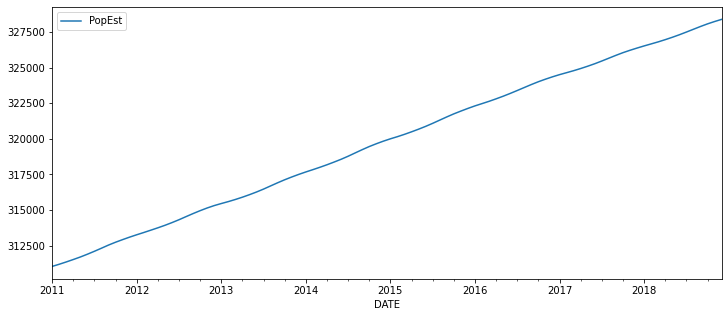

In [6]:
df.plot(figsize=(12, 5))

In [8]:
len(df) - 12

84

In [9]:
train = df.iloc[:84]
test = df.iloc[84:]

In [10]:
model = AR(train['PopEst'])

In [11]:
AR1fit = model.fit(maxlag=1)

In [12]:
AR1fit.aic

6.410771237031904

In [13]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [14]:
start = len(train)
end = len(train) + len(test) - 1

In [15]:
AR1fit.predict(start, end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [17]:
predictions1 = AR1fit.predict(start, end)
predictions1 = predictions1.rename('AR(1) Predictions')

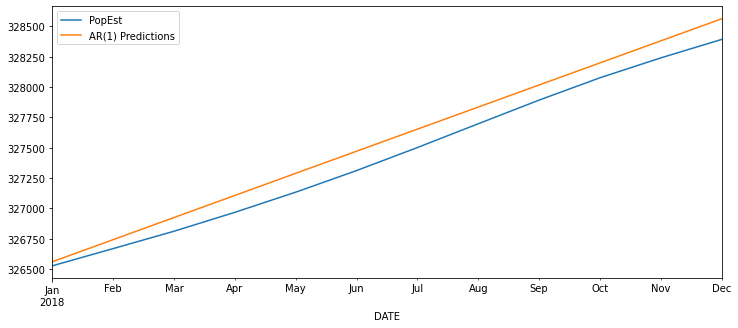

In [20]:
test.plot(figsize=(12, 5), legend=True)
predictions1.plot(legend=True)

In [21]:
AR2fit = model.fit(maxlag=2)

In [22]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [24]:
predictions2 = AR2fit.predict(start, end)
predictions2 = predictions2.rename('AR(2) Predictions')

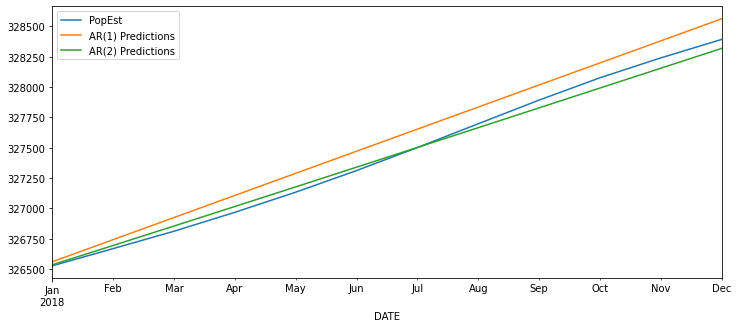

In [25]:
test.plot(figsize=(12, 5), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [27]:
ARfit = model.fit(ic='t-stat')
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [31]:
predictions8 = ARfit.predict(start, end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
labels = ['AR1', 'AR2', 'AR8']

In [32]:
pred = [predictions1, predictions2, predictions8]

In [34]:
for i in range(3):
  error = mean_squared_error(test['PopEst'], pred[i])
  print(f'{labels[i]} MSE was: {error}')

AR1 MSE was: 17449.714242014332
AR2 MSE was: 2713.258895540958
AR8 MSE was: 186.97809636815634


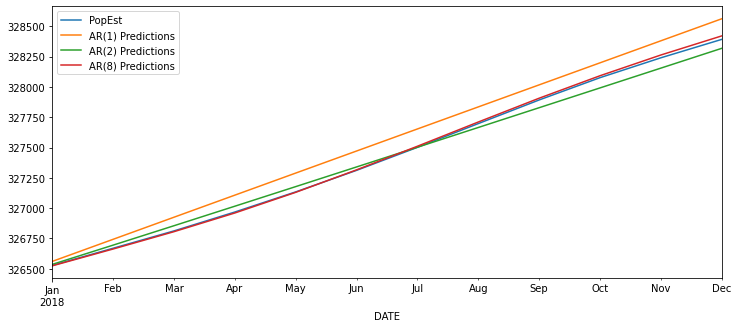

In [35]:
test.plot(figsize=(12, 5), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

In [36]:
model = AR(df['PopEst'])
ARfit = model.fit(ic='t-stat')

In [37]:
forecasted_values = ARfit.predict(start=len(df), end=len(df) + 12).rename('Forecast')

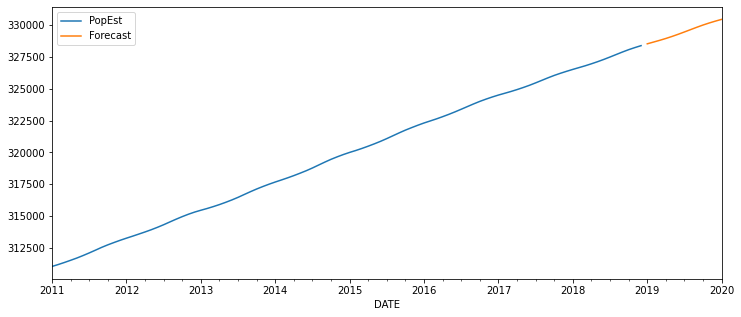

In [42]:
df['PopEst'].plot(figsize=(12, 5), legend=True)
forecasted_values.plot(legend=True)

In [43]:
forecasted_values

2019-01-01    328537.420465
2019-02-01    328673.215498
2019-03-01    328810.443233
2019-04-01    328957.592953
2019-05-01    329117.335933
2019-06-01    329289.277262
2019-07-01    329470.144297
2019-08-01    329655.073664
2019-09-01    329839.483077
2019-10-01    330015.435063
2019-11-01    330175.676110
2019-12-01    330322.580320
2020-01-01    330459.617510
Freq: MS, Name: Forecast, dtype: float64